In [4]:
from torchvision import datasets, transforms
from torch.utils.data import SubsetRandomSampler, DataLoader

EPOCHS = 15

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('trainset', download=True, train=True, transform=transform)
valset = datasets.MNIST('testset', download=True, train=False, transform=transform)

Extracting trainset/MNIST/raw/train-images-idx3-ubyte.gz to trainset/MNIST/raw


Extracting trainset/MNIST/raw/train-labels-idx1-ubyte.gz to trainset/MNIST/raw


Extracting trainset/MNIST/raw/t10k-images-idx3-ubyte.gz to trainset/MNIST/raw


Extracting trainset/MNIST/raw/t10k-labels-idx1-ubyte.gz to trainset/MNIST/raw
Processing...
Done!




/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting testset/MNIST/raw/train-images-idx3-ubyte.gz to testset/MNIST/raw


Extracting testset/MNIST/raw/train-labels-idx1-ubyte.gz to testset/MNIST/raw


Extracting testset/MNIST/raw/t10k-images-idx3-ubyte.gz to testset/MNIST/raw


Extracting testset/MNIST/raw/t10k-labels-idx1-ubyte.gz to testset/MNIST/raw
Processing...
Done!


In [5]:
import torch
from torch import nn


class Net(nn.Module):
    def __init__(self, D, H1, H2, class_count):
        super().__init__()
        self.conv1 = nn.Conv2d(D, H1, kernel_size=5)
        self.conv2 = nn.Conv2d(H1, H2, kernel_size=5)
        self.dropout1 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(320, 50)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc2 = nn.Linear(50, class_count)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.max_pool2d(x, 2)
        x = torch.relu(x)

        x = self.conv2(x)
        x = self.dropout1(x)
        x = torch.max_pool2d(x, 2)
        x = torch.relu(x)

        x = x.view(-1, 320)
        x = self.fc1(x)
        x = torch.relu(x)

        x = self.dropout2(x)
        x = self.fc2(x)

        return torch.log_softmax(x, dim=-1)

-----------------------------------------learning 0-6 model-----------------------------------------
Epoch 0 - Training loss: 0.4676058992527698
Epoch 1 - Training loss: 0.14797534834502674
Epoch 2 - Training loss: 0.11395133780521374
Epoch 3 - Training loss: 0.10356153488704344
Epoch 4 - Training loss: 0.09394550041250158
Epoch 5 - Training loss: 0.08507609127725406
Epoch 6 - Training loss: 0.08179197417396097
Epoch 7 - Training loss: 0.08022788515677903
Epoch 8 - Training loss: 0.07202488162821703
Epoch 9 - Training loss: 0.07095316432878462
Epoch 10 - Training loss: 0.06601808359136624
Epoch 11 - Training loss: 0.06598671069993388
Epoch 12 - Training loss: 0.06303216918178539
Epoch 13 - Training loss: 0.06414345689629
Epoch 14 - Training loss: 0.061351980612593386

Training Time (in minutes) = 2.057491926352183


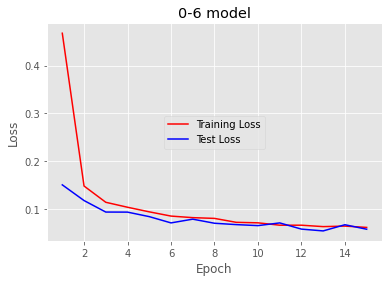

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "



Model Accuracy = 0.9941761363636363
----------------------------------learning 7-9 based on 0-6 model-----------------------------------
Epoch 0 - Training loss: 0.5608430638277488
Epoch 1 - Training loss: 0.18462885029008447
Epoch 2 - Training loss: 0.1434791586740278
Epoch 3 - Training loss: 0.11799579772558524
Epoch 4 - Training loss: 0.10364189573527435
Epoch 5 - Training loss: 0.09704127519427677
Epoch 6 - Training loss: 0.08989300058213434
Epoch 7 - Training loss: 0.0865498490091874
Epoch 8 - Training loss: 0.08097095214251705
Epoch 9 - Training loss: 0.07875032406037034
Epoch 10 - Training loss: 0.07849996477734074
Epoch 11 - Training loss: 0.06804906949400902
Epoch 12 - Training loss: 0.07016504288720157
Epoch 13 - Training loss: 0.06920708459226066
Epoch 14 - Training loss: 0.06859636524455233

Training Time (in minutes) = 0.8380237221717834


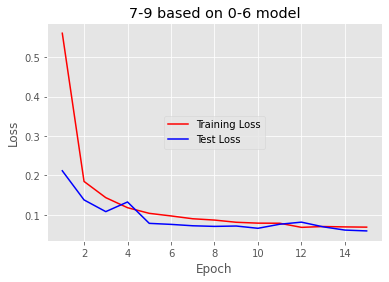


Model Accuracy = 0.9912109375

----------------------------------learning 7-9 model from scratch-----------------------------------
Epoch 0 - Training loss: 0.4295745594394081
Epoch 1 - Training loss: 0.10198527802268945
Epoch 2 - Training loss: 0.06887711710444662
Epoch 3 - Training loss: 0.05793841025222738
Epoch 4 - Training loss: 0.05096956888664606
Epoch 5 - Training loss: 0.04180094523004885
Epoch 6 - Training loss: 0.04038616709798647
Epoch 7 - Training loss: 0.03682783268582958
Epoch 8 - Training loss: 0.031763269646626374
Epoch 9 - Training loss: 0.033831881826526286
Epoch 10 - Training loss: 0.030777687717775417
Epoch 11 - Training loss: 0.029815524343447267
Epoch 12 - Training loss: 0.024385693232946808
Epoch 13 - Training loss: 0.023784363395518
Epoch 14 - Training loss: 0.023084332454310363

Training Time (in minutes) = 0.8894111474355062


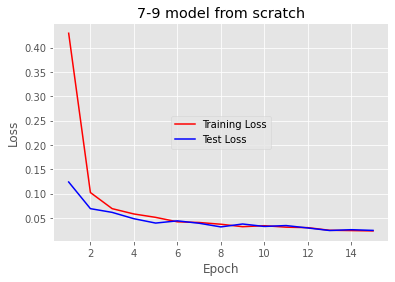


Model Accuracy = 0.9957682291666666


In [8]:
from time import time
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import SubsetRandomSampler, DataLoader

def plot_losses(epochs, train_loss, test_loss, title=''):
    plt.style.use("ggplot")
    plt.plot(epochs, train_loss, 'r', label="Training Loss")
    plt.plot(epochs, test_loss, 'b', label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="center")
    plt.title(title)
    plt.show()


def dataset_split_rule(x_set, min, max):
    return [indx for indx, target_class in enumerate(x_set.targets) if target_class in range(min, max + 1)]


def transferred_network(model_path):
    model = torch.load(model_path)
    model.conv1.weight.requires_grad = False
    model.conv1.bias.requires_grad = False
    model.conv2.weight.requires_grad = False
    model.conv2.bias.requires_grad = False
    model.fc2 = nn.Linear(50, 10).cuda()
    return model


def empty_network():
    return Net(D=1, H1=10, H2=20, class_count=10).cuda()


def train_model(train_data, test_data, model, optimizer, criterion=nn.NLLLoss(), epochs=EPOCHS, title=''):
    model.train()
    time0 = time()
    train_losses = []
    test_losses = []

    for e in range(epochs):
        running_loss = 0
        for images, labels in train_data:
            # Flatten MNIST images into a 784 long vector
            # images = images.view(images.shape[0], -1)
            images = images.cuda()
            labels = labels.cuda()
            # Training pass
            optimizer.zero_grad()

            output = model(images)
            loss = criterion(output, labels)

            # This is where the model learns by backpropagating
            loss.backward()

            # And optimizes its weights here
            optimizer.step()

            running_loss += loss.item()
        else:
            train_losses += [(running_loss / len(train_data))]
            test_losses += [sum([criterion(model(images.cuda()), test_labels.cuda()).item() for images, test_labels in
                                 test_data]) / len(test_data)]
            print("Epoch {} - Training loss: {}".format(e, running_loss / len(train_data)))

    print("\nTraining Time (in minutes) =", (time() - time0) / 60)
    plot_losses(torch.linspace(1, epochs, epochs), train_losses, test_losses, title)


def evaluate_model(test_data, model):
    model.eval()
    acc, count = 0, 0
    with torch.no_grad():
        for images, labels in test_data:
            images = images.cuda()
            labels = labels.cuda()

            pred_labels = torch.argmax(torch.exp(model(images)), 1)
            acc += torch.sum(pred_labels == labels).item() / len(labels)
            count += 1

    print("\nModel Accuracy =", acc / count)


def main():
    train_data_zero_to_six = DataLoader(trainset, batch_size=64,
                                        sampler=SubsetRandomSampler(dataset_split_rule(x_set=trainset, min=0, max=6)))
    test_data_zero_to_six = DataLoader(valset, batch_size=64,
                                       sampler=SubsetRandomSampler(dataset_split_rule(x_set=valset, min=0, max=6)))
    train_data_seven_to_nine = DataLoader(trainset, batch_size=64,
                                          sampler=SubsetRandomSampler(dataset_split_rule(x_set=trainset, min=7, max=9)))
    test_data_seven_to_nine = DataLoader(valset, batch_size=64,
                                         sampler=SubsetRandomSampler(dataset_split_rule(x_set=valset, min=7, max=9)))

    torch.manual_seed(42)

    print("learning 0-6 model".center(100, '-'))
    model = empty_network()
    optimizer = optim.Adam(model.parameters())

    train_model(train_data_zero_to_six,
                test_data_zero_to_six,
                model,
                optimizer,
                title="0-6 model")

    torch.save(model, 'zero_to_six.pt')
    evaluate_model(test_data_zero_to_six, model)

    print("learning 7-9 based on 0-6 model".center(100, '-'))
    model = transferred_network('zero_to_six.pt')
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))

    train_model(train_data_seven_to_nine,
                test_data_seven_to_nine,
                model,
                optimizer,
                title="7-9 based on 0-6 model")

    evaluate_model(test_data_seven_to_nine, model)

    print()
    print("learning 7-9 model from scratch".center(100, '-'))
    model = empty_network()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))

    train_model(train_data_seven_to_nine,
                test_data_seven_to_nine,
                model,
                optimizer,
                title="7-9 model from scratch")

    evaluate_model(test_data_seven_to_nine, model)


main()